In [10]:
import resampy
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import Audio

In [11]:
# Importar a biblioteca pandas e carregar o arquivo CSV contendo informações sobre os áudios
audiofiles = pd.read_csv(r'C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\meta\esc50.csv')

# Exibir as primeiras linhas do dataframe para visualizar os dados
audiofiles.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

In [12]:
audiofiles['category'].unique()

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

In [13]:
# Definir a categoria desejada para a análise
desired_category = 'chainsaw'

# Encontrar o índice do primeiro áudio na categoria desejada no dataframe 'audiofiles'
idx = np.where(audiofiles['category'] == desired_category)[0][0]

# Caminho base para a pasta de áudio
base_path = r'C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio'

# Construir o caminho completo para o arquivo de áudio da categoria desejada
audio_path = f"{base_path}\\{audiofiles['filename'][idx]}"

# Carregar o áudio usando a biblioteca librosa
original_audio, sample_rate = librosa.load(audio_path)

# Reproduzir o áudio carregado
Audio(data=original_audio, rate=sample_rate)

Text(0.5, 23.52222222222222, 'Tempo [segundos]')

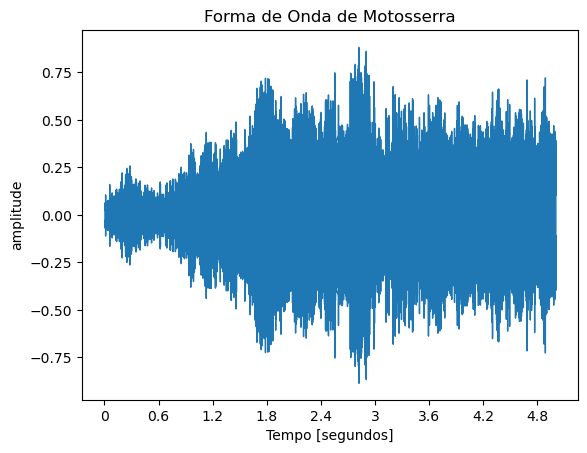

In [14]:
import matplotlib.pyplot as plt

# Criar uma figura e um eixo para a visualização
fig, ax = plt.subplots(nrows=1, sharex=True)

# Exibir a forma de onda do áudio usando a função waveshow da biblioteca librosa
librosa.display.waveshow(original_audio, sr=sample_rate, ax=ax)

# Definir o título do eixo vertical (y) da figura
ax.set(title='Forma de Onda de Motosserra')

# Definir o rótulo do eixo vertical (y)
ax.set_ylabel('amplitude')

# Definir o rótulo do eixo horizontal (x)
ax.set_xlabel('Tempo [segundos]')

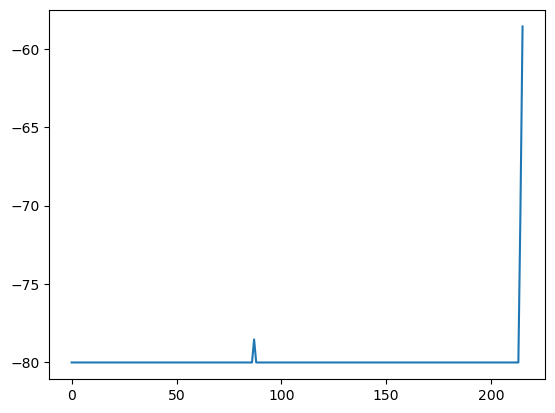

In [15]:
# Converter o espectrograma em escala de decibéis usando a função amplitude_to_db
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)), ref=np.max)

# Obter a forma (shape) do espectrograma convertido
D.shape

# Plotar uma linha do espectrograma convertido
plt.plot(D[1000])

Text(0.5, 1.0, 'chainsaw')

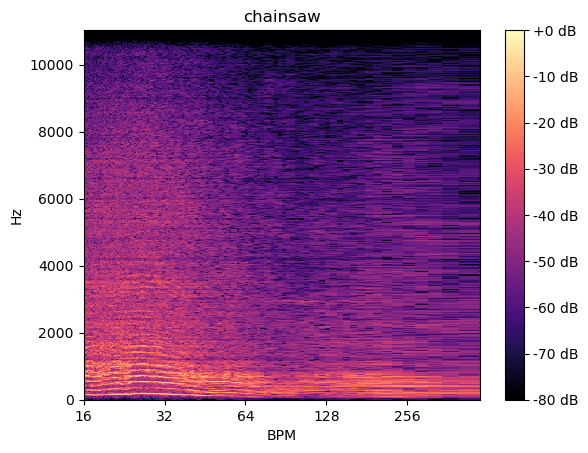

In [16]:
# Exibir o espectrograma com eixos lineares para y e tempo para x
librosa.display.specshow(D, y_axis='linear', x_axis='tempo')

# Adicionar uma barra de cores ao gráfico com formatação de decibéis
plt.colorbar(format='%+2.0f dB')

# Definir o título do gráfico
plt.title(desired_category)

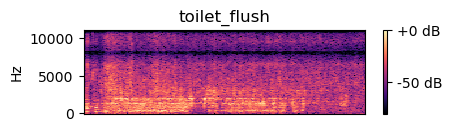

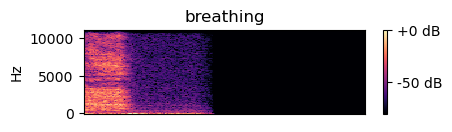

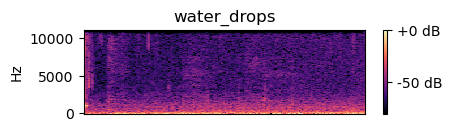

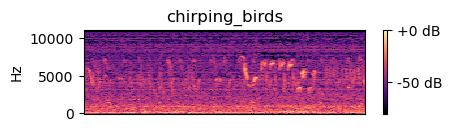

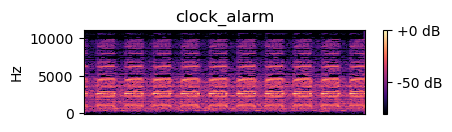

In [17]:
# Criar um gerador de números aleatórios
rng = np.random.default_rng()

# Gerar uma amostra de índices aleatórios baseados no tamanho do dataframe 'audiofiles'
sample = rng.integers(0, audiofiles.shape[0], size=5)

# Iterar sobre os índices da amostra aleatória
for i in sample:
    # Construir o caminho para o arquivo de áudio
    path = 'C:/Users/victo/CHAINSAWPAIN/UNIVERSAL_NOISES/ESC-50-master/audio/' + str(audiofiles['filename'][i])
    
    # Carregar o áudio usando a biblioteca librosa
    data, sampling_rate = librosa.load(path)
    
    # Criar uma nova figura com tamanho especificado
    plt.figure(figsize=(10, 5))
    
    # Calcular a representação de magnitude do espectrograma
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    
    # Adicionar um subplot à figura (4 linhas, 2 colunas, índice 1)
    plt.subplot(4, 2, 1)
    
    # Exibir o espectrograma linearmente usando a função specshow
    librosa.display.specshow(D, y_axis='linear')
    
    # Adicionar uma barra de cores ao gráfico com formatação de decibéis
    plt.colorbar(format='%+2.0f dB')
    
    # Definir o título do gráfico com a categoria do áudio
    plt.title(audiofiles['category'][i])
    
    # Mostrar o gráfico
    plt.show()


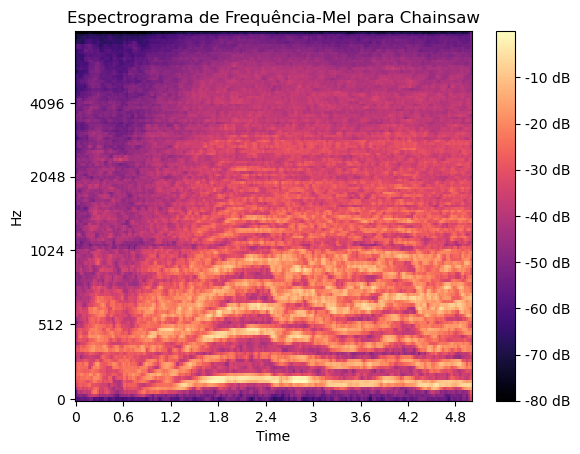

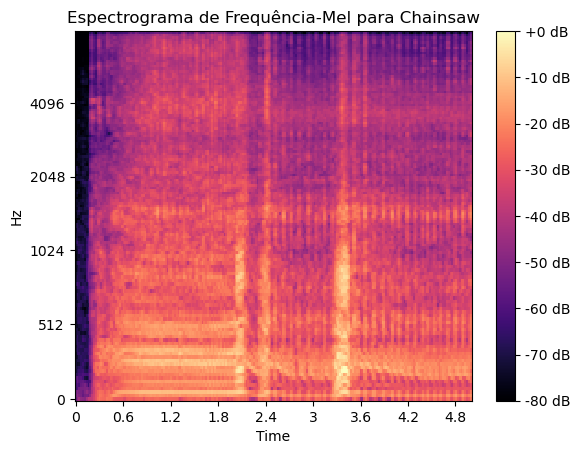

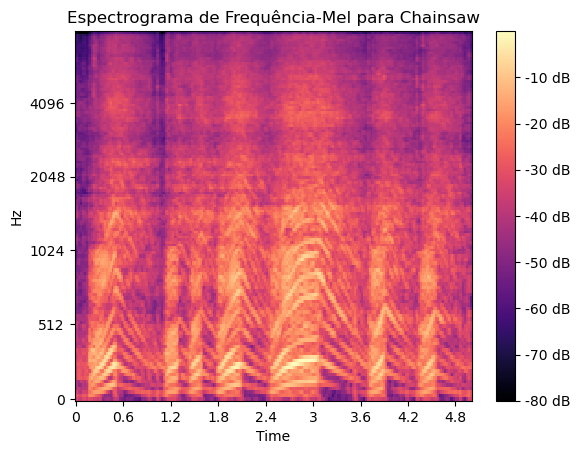

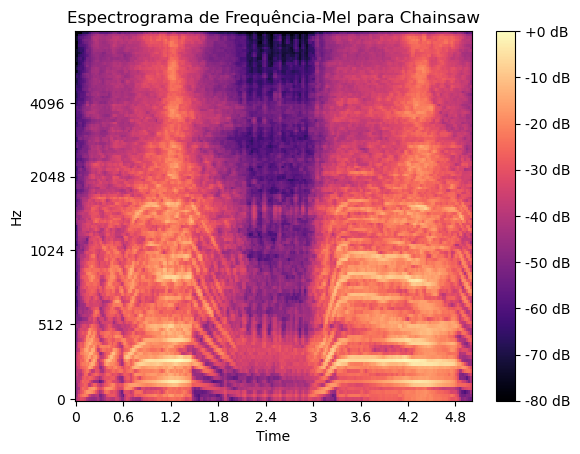

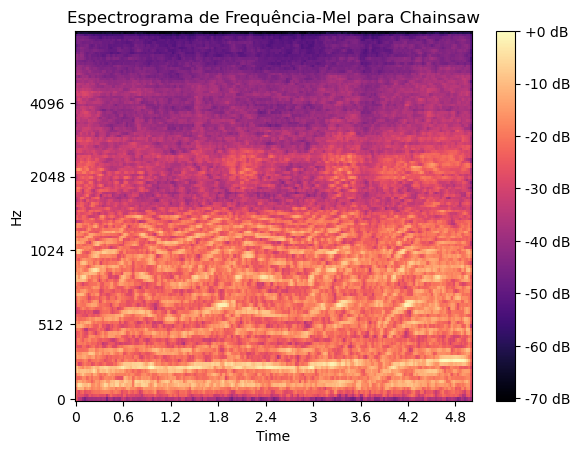

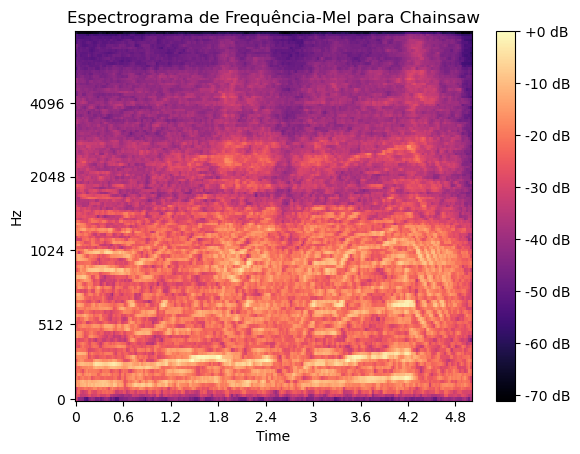

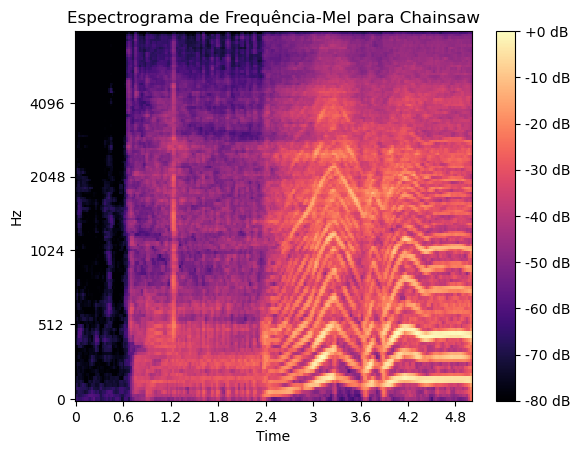

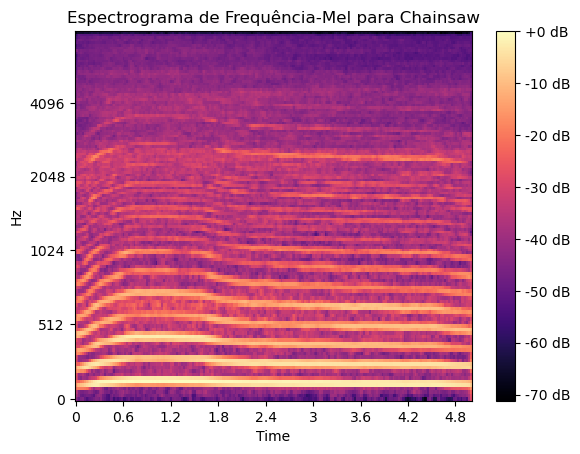

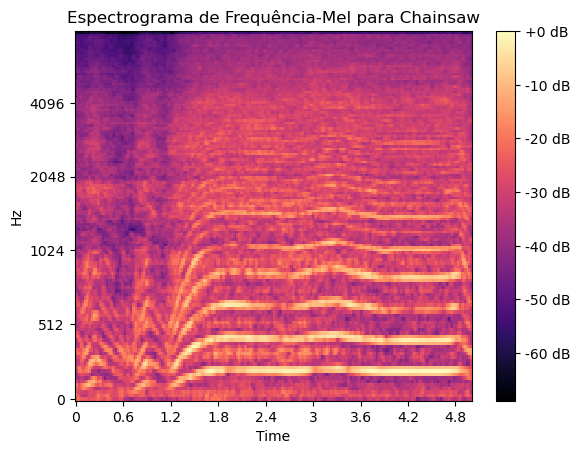

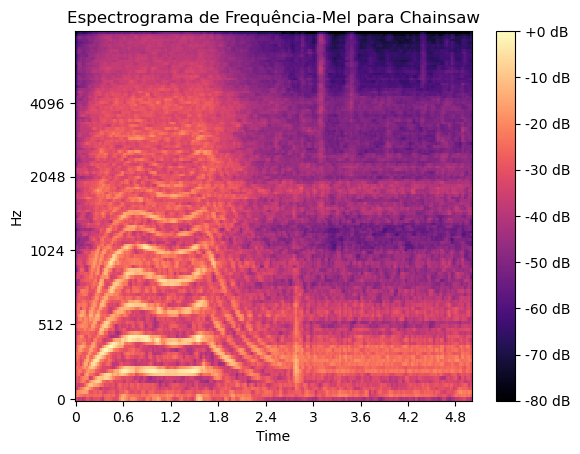

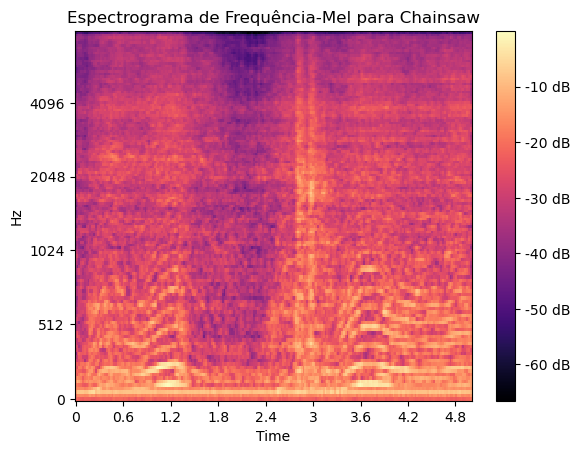

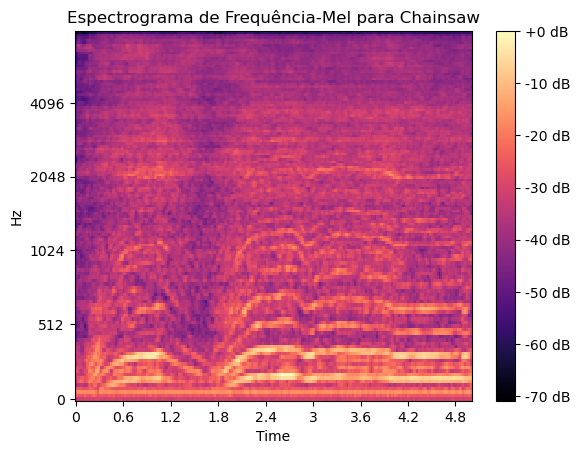

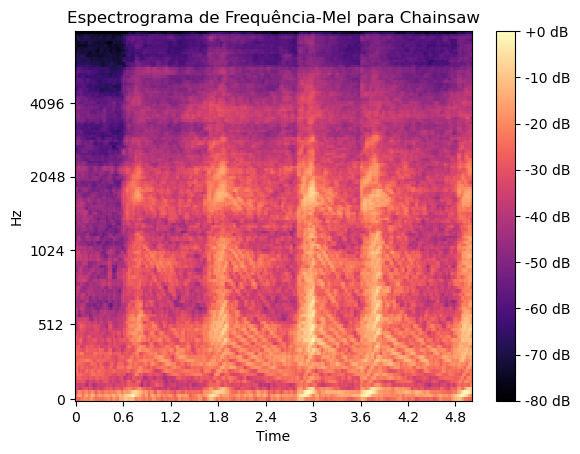

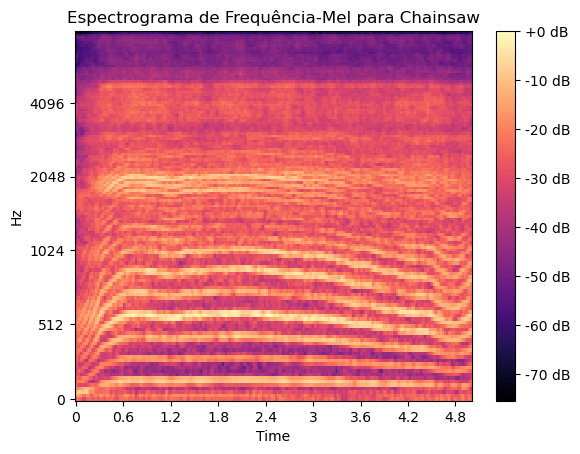

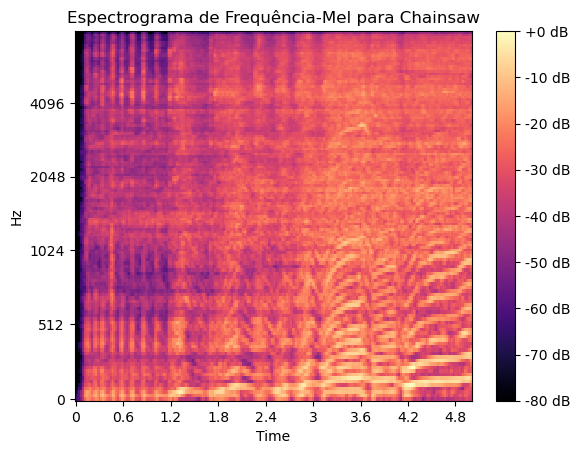

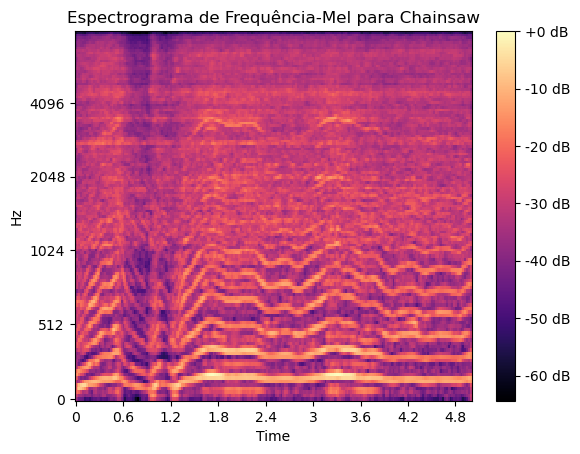

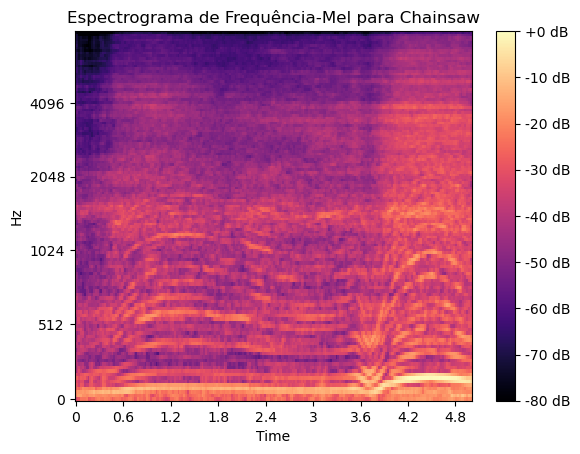

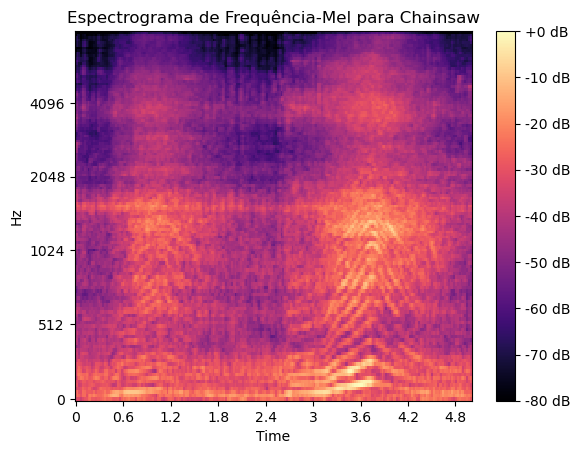

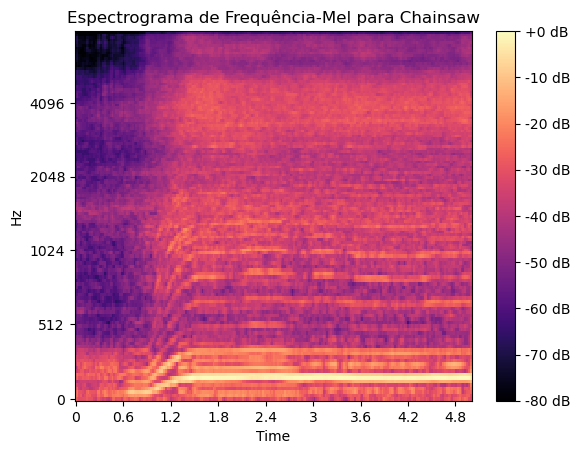

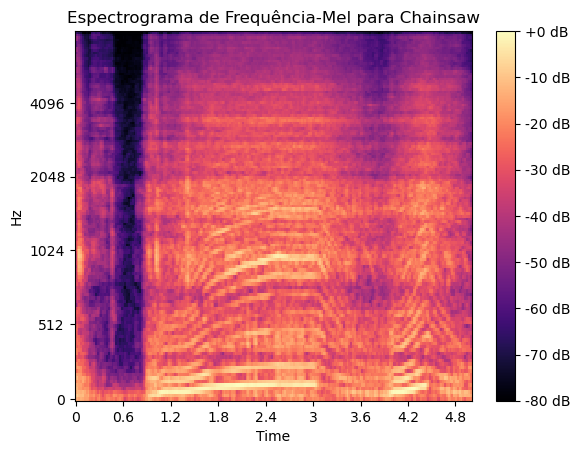

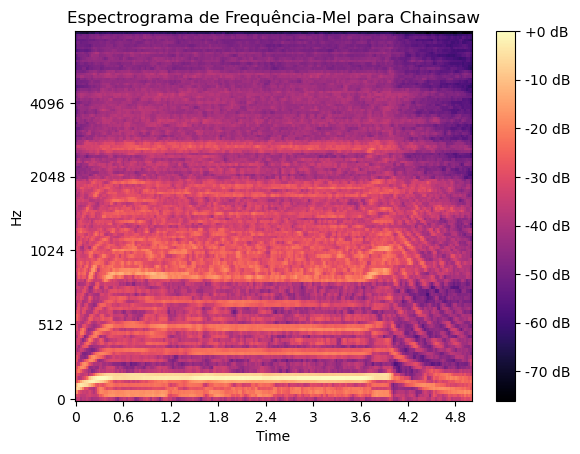

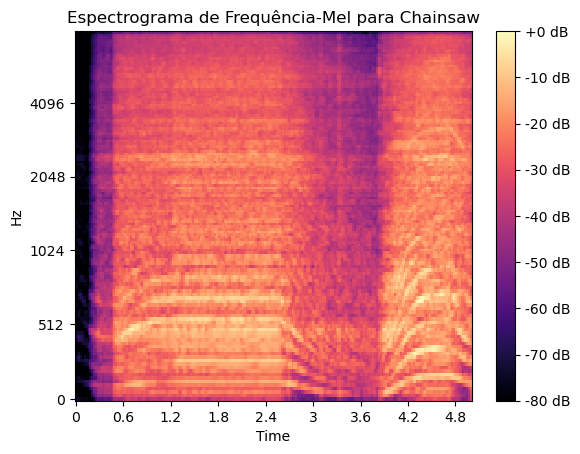

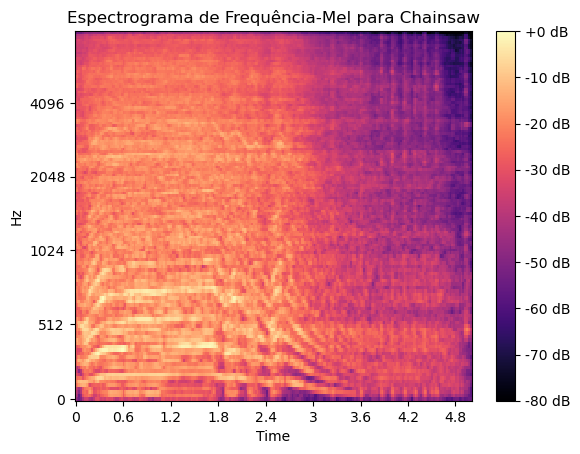

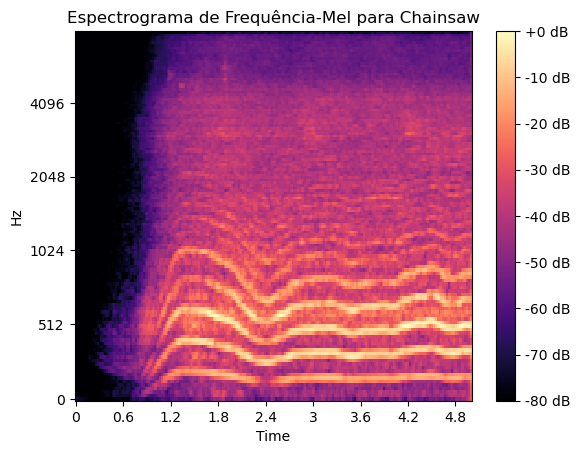

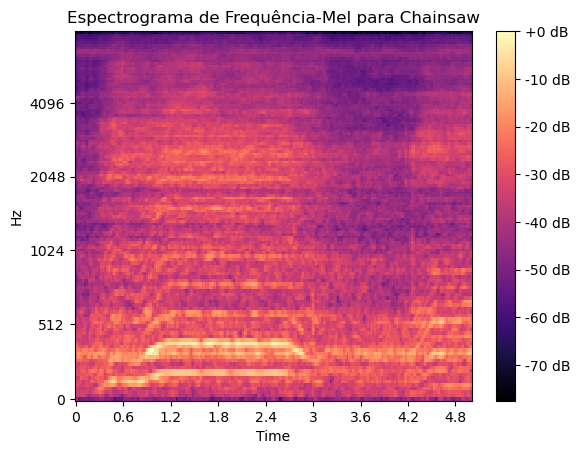

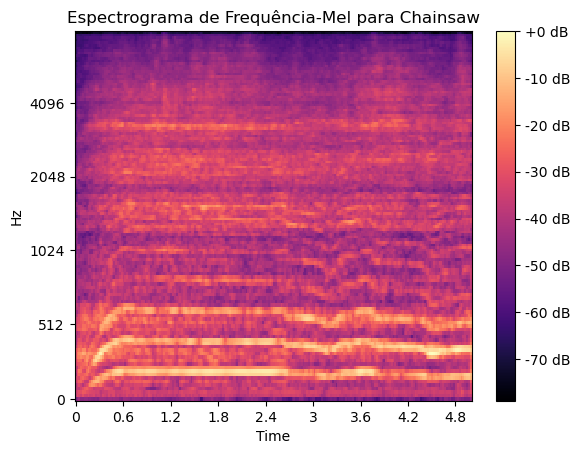

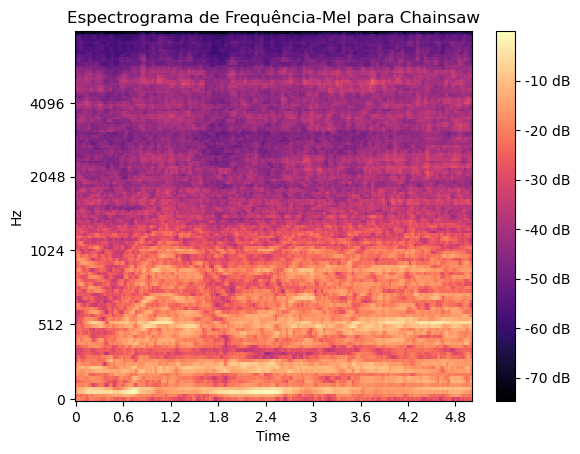

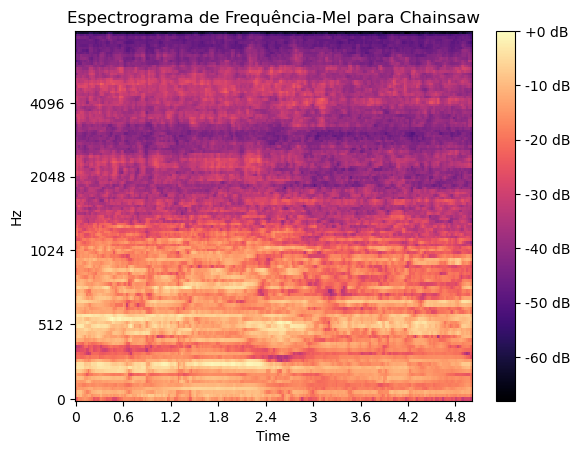

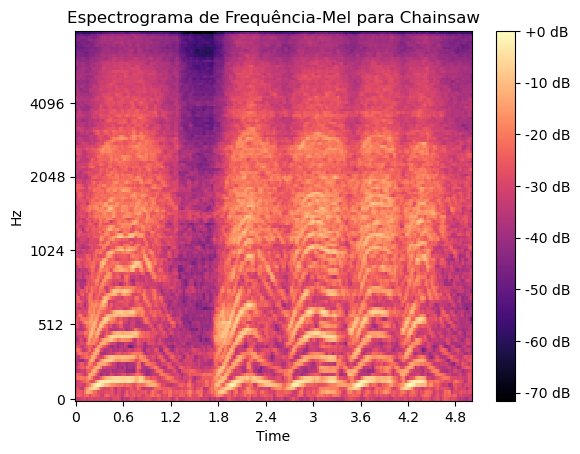

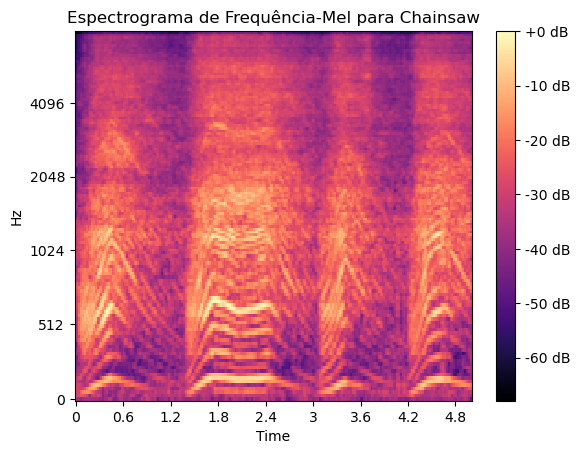

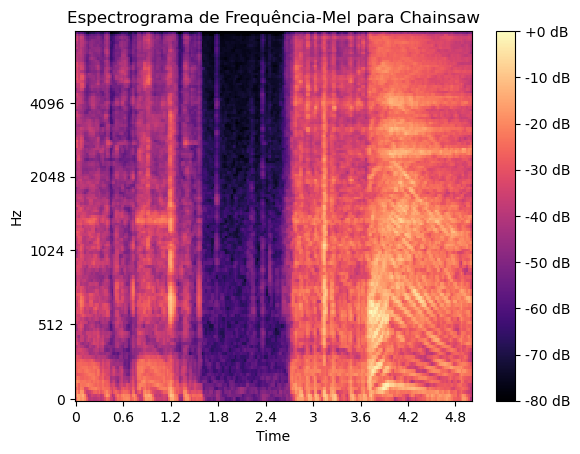

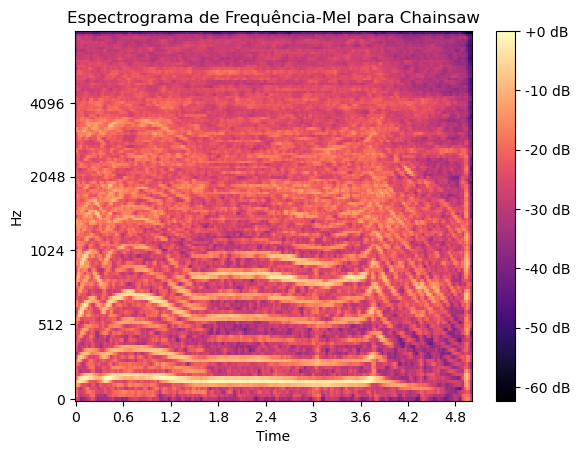

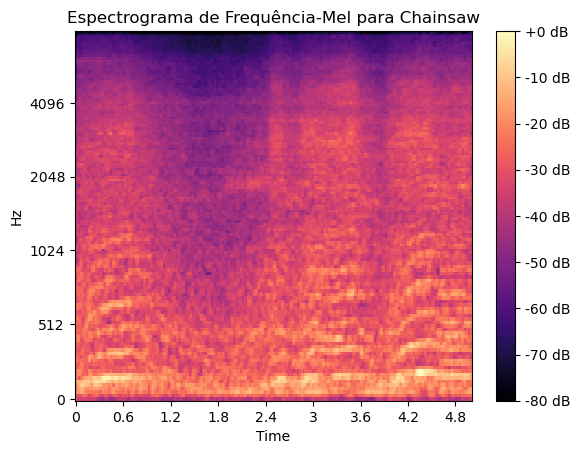

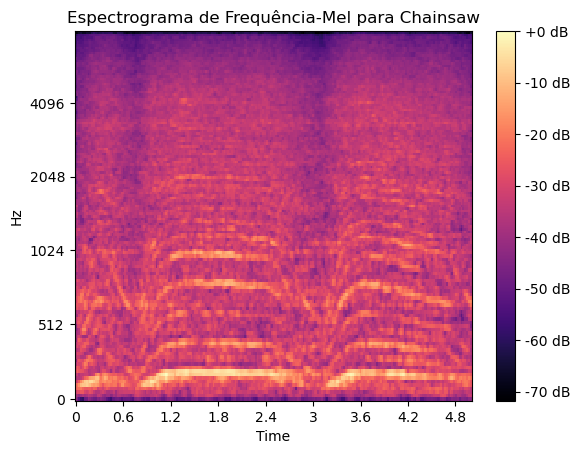

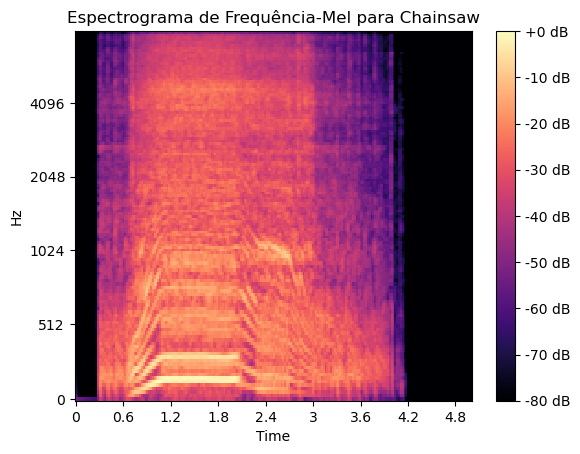

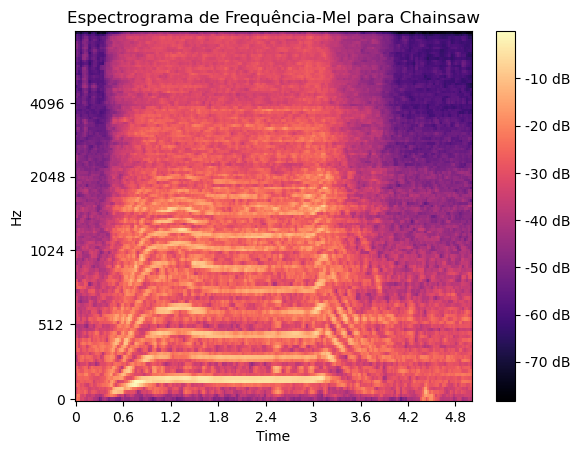

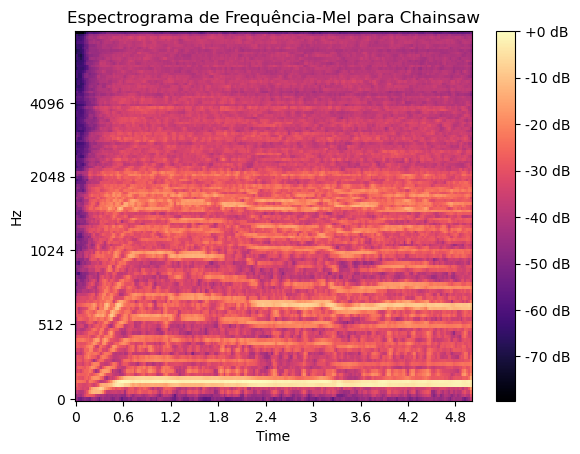

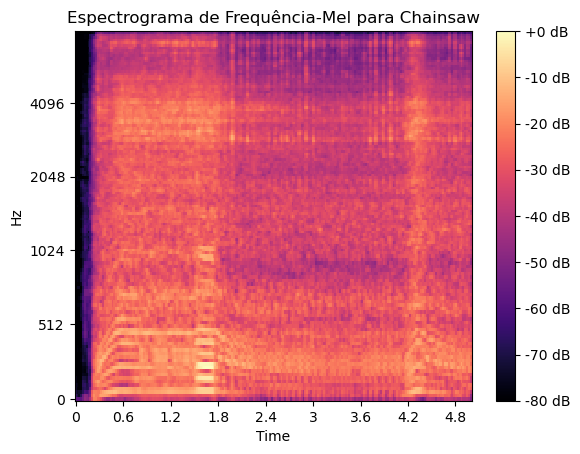

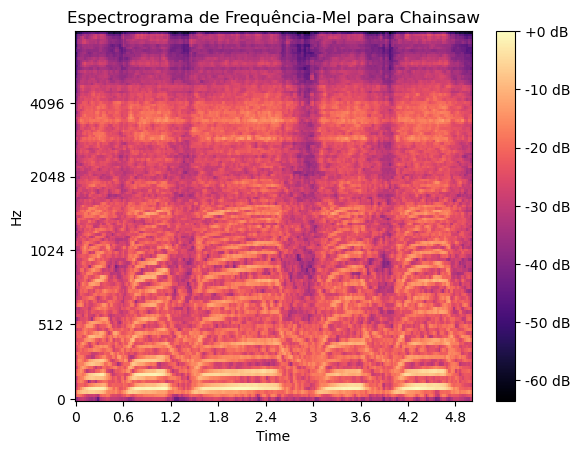

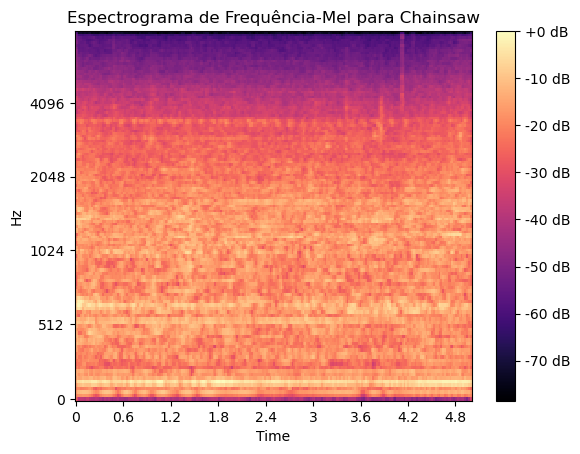

In [18]:
# Encontrar os índices dos áudios da categoria 'chainsaw'
chainsaw_indices = np.where(audiofiles['category'] == 'chainsaw')[0]

# Iterar sobre os índices dos áudios da categoria 'chainsaw'
for i in chainsaw_indices:
    # Construir o caminho para o arquivo de áudio
    path = 'C:/Users/victo/CHAINSAWPAIN/UNIVERSAL_NOISES/ESC-50-master/audio/' + str(audiofiles['filename'][i])
    
    # Carregar o áudio usando a biblioteca librosa
    data, sampling_rate = librosa.load(path)
    
    # Calcular o espectrograma de frequência mel
    melspec = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    
    # Criar uma figura e eixo para a visualização do espectrograma
    fig, ax = plt.subplots()
    
    # Converter o espectrograma para a escala de decibéis
    S_dB = librosa.power_to_db(melspec, ref=np.max)
    
    # Exibir o espectrograma usando a função specshow
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sampling_rate, fmax=8000, ax=ax)
    
    # Adicionar uma barra de cores ao gráfico
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    
    # Definir o título do gráfico
    ax.set(title='Espectrograma de Frequência-Mel para Chainsaw')
    
    # Mostrar o gráfico
    plt.show()


In [51]:
import os

audiofiles = pd.read_csv(r'C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\meta\esc50.csv')

# Listas para armazenar características e rótulos
features = []
labels = []

# Iterar sobre cada exemplo no conjunto de dados
for i in range(len(audiofiles)):
    # Caminho completo para o arquivo de áudio
    filename = os.path.join(base_path, audiofiles['filename'][i])
    
    # Carregar o áudio usando a biblioteca librosa
    X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    
    # Extrair características de mel spectrogram
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    
    # Adicionar as características e rótulos às listas
    features.append(mels)
    labels.append(audiofiles['category'][i])

In [58]:
# Converter rótulos de string para inteiros
unique_labels = np.unique(labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
Y_int = [label_to_int[label] for label in labels]

# Converter listas em arrays numpy
X = np.array(features)
Y = np.array(Y_int)

# Dividir os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=123, test_size=0.2)

# Dividir os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=123, test_size=0.2)

# Imprimir informações sobre os dados
print('Número de amostras de treino:', X_train.shape[0])
print('Número de amostras de teste:', X_test.shape[0])

Número de amostras de treino: 1600
Número de amostras de teste: 400


In [61]:
# Criar modelo sequencial
model = Sequential([
    Dense(1000, activation='relu', input_shape=(128,)),
    Dense(750, activation='relu'),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='softmax'),
])

# Sumário do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              129000    
                                                                 
 dense_15 (Dense)            (None, 750)               750750    
                                                                 
 dense_16 (Dense)            (None, 500)               375500    
                                                                 
 dense_17 (Dense)            (None, 250)               125250    
                                                                 
 dense_18 (Dense)            (None, 100)               25100     
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 50)               

In [67]:
#Saber o número real de classes do dataset usado
audiofiles_path = r'C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\meta\esc50.csv'

# Carregar os metadados em um DataFrame do pandas
audiofilesfiles = pd.read_csv(audiofiles_path)

# Extrair as classes únicas do DataFrame
unique_classes = audiofilesfiles['category'].unique()

# Número de classes únicas
num_classes = len(unique_classes)

print("Número de classes:", num_classes)
print("Classes únicas:", unique_classes)

Número de classes: 50
Classes únicas: ['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']


In [68]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Converter rótulos em formato one-hot
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

# Treinar o modelo
model.fit(X_train, Y_train_one_hot, epochs=90, batch_size=50, validation_data=(X_test, Y_test_one_hot))

Epoch 1/90
32/32 [==============================] - 1s 17ms/step - loss: 0.4901 - accuracy: 0.8700 - val_loss: 8.9506 - val_accuracy: 0.2725
Epoch 2/90
32/32 [==============================] - 0s 13ms/step - loss: 0.4818 - accuracy: 0.8737 - val_loss: 9.6820 - val_accuracy: 0.2925
Epoch 3/90
32/32 [==============================] - 0s 13ms/step - loss: 0.5750 - accuracy: 0.8888 - val_loss: 8.5388 - val_accuracy: 0.2800
Epoch 4/90
32/32 [==============================] - 0s 14ms/step - loss: 0.4808 - accuracy: 0.8694 - val_loss: 9.2852 - val_accuracy: 0.2650
Epoch 5/90
32/32 [==============================] - 0s 13ms/step - loss: 0.4063 - accuracy: 0.8863 - val_loss: 9.1683 - val_accuracy: 0.2625
Epoch 6/90
32/32 [==============================] - 0s 13ms/step - loss: 0.4428 - accuracy: 0.8906 - val_loss: 9.7850 - val_accuracy: 0.2850
Epoch 7/90
32/32 [==============================] - 0s 14ms/step - loss: 0.4940 - accuracy: 0.8694 - val_loss: 10.1392 - val_accuracy: 0.2950
Epoch 8/90
3

32/32 [==============================] - 0s 13ms/step - loss: 0.4915 - accuracy: 0.8875 - val_loss: 10.3453 - val_accuracy: 0.3000
Epoch 59/90
32/32 [==============================] - 0s 13ms/step - loss: 1.0935 - accuracy: 0.8994 - val_loss: 10.4826 - val_accuracy: 0.3000
Epoch 60/90
32/32 [==============================] - 0s 13ms/step - loss: 0.6114 - accuracy: 0.8431 - val_loss: 10.7461 - val_accuracy: 0.2925
Epoch 61/90
32/32 [==============================] - 0s 13ms/step - loss: 0.5334 - accuracy: 0.8681 - val_loss: 10.7600 - val_accuracy: 0.2875
Epoch 62/90
32/32 [==============================] - 0s 13ms/step - loss: 0.3924 - accuracy: 0.8950 - val_loss: 9.8819 - val_accuracy: 0.3125
Epoch 63/90
32/32 [==============================] - 0s 13ms/step - loss: 0.3143 - accuracy: 0.9119 - val_loss: 10.4096 - val_accuracy: 0.3200
Epoch 64/90
32/32 [==============================] - 0s 13ms/step - loss: 0.3318 - accuracy: 0.9212 - val_loss: 8.6886 - val_accuracy: 0.3000
Epoch 65/90
3

In [135]:
def prediction_parser(filename, model):
    # Inicializa listas para armazenar características e etiquetas
    feature = []
    label = []
    
    # Carrega os dados de áudio usando o librosa
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    
    # Extrai a característica do espectrograma Mel do dado de áudio
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)        
    feature.append(mels)
    
    # Extrai o nome do arquivo sem o caminho usando o os.path.basename
    file_name = os.path.basename(filename)
    
    # Encontra a categoria correspondente usando o DataFrame audiofiles
    # onde o nome do arquivo corresponde à coluna 'filename'
    # Extrai o valor da categoria correspondente
    label.append(audiofiles[audiofiles['filename'] == file_name]["category"].values[0])
    
    # Prepara os dados para a previsão
    temp_preds = np.array([feature, label], dtype=object)
    data_preds = temp_preds.transpose()
    X_ = data_preds[:, 0]
    
    # Cria um array vazio para armazenar os dados da característica
    X = np.empty([1, 128])
    X[0] = (X_[0])
    
    # Prevê o índice da classe usando o modelo treinado
    predicted_class_index = np.argmax(model.predict(X))
    
    # Obtém o nome da classe prevista usando o array unique_classes
    predicted_class_name = unique_classes[predicted_class_index]
    
    # Obtém o nome real da classe
    real_class_name = label[0]
    
    # Imprime o nome da classe prevista e real
    print('Classe Prevista:', predicted_class_name[0])
    print('Classe real:', real_class_name)
    
    # Retorna os dados de áudio com sua taxa de amostragem
    return Audio(data=audiodata, rate=sample_rate)

In [138]:
# Agrupar classes únicas/ referência das classes
unique_classes = audiofiles.groupby('category')['target'].unique()

print(unique_classes)

category
airplane            [47]
breathing           [23]
brushing_teeth      [27]
can_opening         [34]
car_horn            [43]
cat                  [5]
chainsaw            [41]
chirping_birds      [14]
church_bells        [46]
clapping            [22]
clock_alarm         [37]
clock_tick          [38]
coughing            [24]
cow                  [3]
crackling_fire      [12]
crickets            [13]
crow                 [9]
crying_baby         [20]
dog                  [0]
door_wood_creaks    [33]
door_wood_knock     [30]
drinking_sipping    [29]
engine              [44]
fireworks           [48]
footsteps           [25]
frog                 [4]
glass_breaking      [39]
hand_saw            [49]
helicopter          [40]
hen                  [6]
insects              [7]
keyboard_typing     [32]
laughing            [26]
mouse_click         [31]
pig                  [2]
pouring_water       [17]
rain                [10]
rooster              [1]
sea_waves           [11]
sheep           

In [ ]:
#Abaixo, uma serie de testes para ver se a IA consegue distinguir e detectar o som da motosserra e outros

In [140]:
#Aqui onde fará a previsão
#Som de motosserra 1
#Detectou com sucesso
prediction_parser(r"C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio\1-116765-A-41.wav",model)

1/1 [==============================] - 0s 19ms/step
Classe Prevista: 41
Classe real: chainsaw


In [149]:
#Aqui onde fará a previsão
#Som de motosserra 3
#Detectou com sucesso
prediction_parser(r"C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio\2-50668-B-41.wav",model)

1/1 [==============================] - 0s 20ms/step
Classe Prevista: 41
Classe real: chainsaw


In [150]:
#Aqui onde fará a previsão
#Som de motosserra 4
#Detectou com sucesso
prediction_parser(r"C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio\2-50667-A-41.wav",model)

1/1 [==============================] - 0s 19ms/step
Classe Prevista: 41
Classe real: chainsaw


In [153]:
#Aqui onde fará a previsão
#Som de serrote 2
#Confundiu identificar com sucesso
prediction_parser(r"C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio\2-51630-B-49.wav",model)

1/1 [==============================] - 0s 19ms/step
Classe Prevista: 49
Classe real: hand_saw


In [154]:
#Aqui onde fará a previsão
#Som de porta abrindo
#Confundiu identificar com sucesso
prediction_parser(r"C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio\2-70367-A-33.wav",model)

1/1 [==============================] - 0s 21ms/step
Classe Prevista: 33
Classe real: door_wood_creaks


In [155]:
prediction_parser(r"C:\Users\victo\CHAINSAWPAIN\UNIVERSAL_NOISES\ESC-50-master\audio\2-70936-A-42.wav",model)

1/1 [==============================] - 0s 16ms/step
Classe Prevista: 42
Classe real: siren
